# Linear Regression

The code is obtained from a Udemy course (PyTorch: Deep Learning and Artificial Intelligence).

The code is also complementary to notes found in Obsidian.

In [513]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [514]:
# constants (model will try to predict these values)
N = 100
m = 0.5
b = -2

In [515]:
# generate random data of size N
X = np.random.random(N) * 10 - 5
Y = m * X + b + np.random.randn(N) # Gaussian noise added to the Y values
# Y = m * X + b

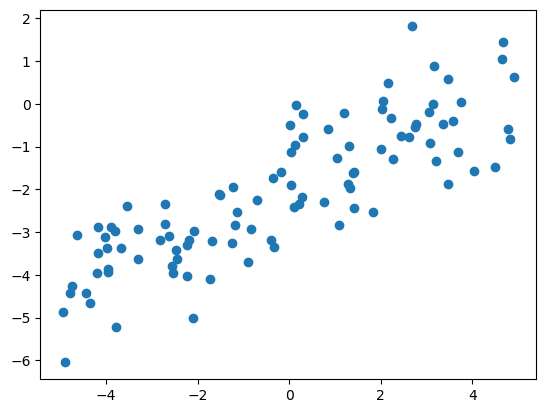

In [516]:
# plot the data
f = plt.scatter(X, Y)

In [517]:
# create a linear regression model
model = nn.Linear(1, 1)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [518]:
# reshape the data to be `num_samples` by `num_dimensions`
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# cast the data type to float32 (PyTorch uses float32 by default; numpy uses float64)
inputs = torch.from_numpy(X.astype(np.float32)) # X = torch.from_numpy(X).type(torch.FloatTensor)
target = torch.from_numpy(Y.astype(np.float32)) # Y = torch.from_numpy(Y).type(torch.FloatTensor)

In [519]:
print("INPUTS:", type(inputs))
print("TARGET:", type(target))

INPUTS: <class 'torch.Tensor'>
TARGET: <class 'torch.Tensor'>


An example of `reshape` is shown below. It changes the dimensions of an array.

In [520]:
arr = np.random.random(10) * 100 - 50
print("ARRAY:", arr)

ARRAY: [-12.53193631  -0.50329308  -9.55257469   9.57015002 -27.24310553
 -48.98179702 -11.20291774   8.41176872 -24.73066769 -26.65591158]


In [521]:
# reshape to 2 rows by 5 columns
print(arr.reshape(2, 5))

[[-12.53193631  -0.50329308  -9.55257469   9.57015002 -27.24310553]
 [-48.98179702 -11.20291774   8.41176872 -24.73066769 -26.65591158]]


Both `inputs` and `target` variables are of type `torch.Tensor`.

In [522]:
# train the model
num_epochs = 40
losses = []
for it in range(num_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, target)

    # store losses in an array for plotting
    losses.append(loss.item())

    # backward pass
    loss.backward()
    optimizer.step()

    # store gradients in an array for plotting
    w = model.weight.data.numpy()
    b = model.bias.data.numpy()
    print(f'Epoch {it + 1}/{num_epochs}, Loss: {loss.item():.4f}, Weight: {w}, Bias: {b}')

Epoch 1/40, Loss: 16.8201, Weight: [[-0.63571584]], Bias: [-0.97459847]
Epoch 2/40, Loss: 12.2615, Weight: [[-0.4506799]], Bias: [-0.99927807]
Epoch 3/40, Loss: 9.0582, Weight: [[-0.29588994]], Bias: [-1.0226622]
Epoch 4/40, Loss: 6.8047, Weight: [[-0.16641377]], Bias: [-1.0449077]
Epoch 5/40, Loss: 5.2171, Weight: [[-0.05812329]], Bias: [-1.0661471]
Epoch 6/40, Loss: 4.0963, Weight: [[0.03243664]], Bias: [-1.0864924]
Epoch 7/40, Loss: 3.3028, Weight: [[0.10815783]], Bias: [-1.1060383]
Epoch 8/40, Loss: 2.7389, Weight: [[0.17146073]], Bias: [-1.1248652]
Epoch 9/40, Loss: 2.3362, Weight: [[0.22437117]], Bias: [-1.1430411]
Epoch 10/40, Loss: 2.0468, Weight: [[0.2685847]], Bias: [-1.1606243]
Epoch 11/40, Loss: 1.8370, Weight: [[0.30552045]], Bias: [-1.177664]
Epoch 12/40, Loss: 1.6832, Weight: [[0.33636618]], Bias: [-1.194203]
Epoch 13/40, Loss: 1.5689, Weight: [[0.36211604]], Bias: [-1.2102774]
Epoch 14/40, Loss: 1.4826, Weight: [[0.38360205]], Bias: [-1.2259188]
Epoch 15/40, Loss: 1.416

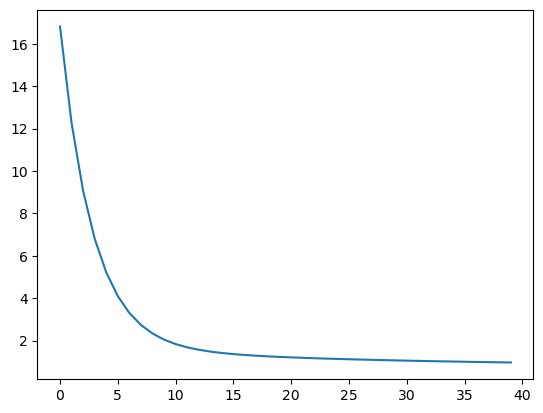

In [523]:
# plot the loss
plt.plot(losses)

A decreasing (fast start, slow end) curve is **ideal** when training machine learning models. 

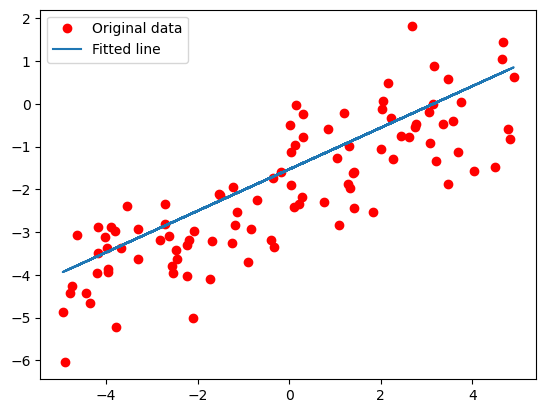

In [524]:
# prediction and plot
predicted = model(inputs).detach().numpy() # detach the tensor
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

Alternative way to make predictions without gradients is shown below.

In [525]:
with torch.no_grad():
    out = model(inputs).numpy()
print(out, type(out))

[[-2.8436601e+00]
 [-3.2489443e+00]
 [-3.6418951e+00]
 [-5.5582780e-01]
 [-3.9338424e+00]
 [-1.4584864e+00]
 [ 2.1006775e-01]
 [-2.7216592e+00]
 [ 1.0587931e-01]
 [-1.1208286e+00]
 [-1.5064524e+00]
 [-1.6197553e+00]
 [-2.5399899e-01]
 [-8.5806632e-01]
 [-4.8528683e-01]
 [-2.7589221e+00]
 [ 6.4924264e-01]
 [-2.2710409e+00]
 [-3.1359458e+00]
 [-3.5734158e+00]
 [-1.4775261e+00]
 [-5.3542960e-01]
 [-1.8734449e+00]
 [ 2.7737856e-02]
 [ 2.6409090e-01]
 [-8.9125055e-01]
 [-1.0029268e+00]
 [-2.3687959e+00]
 [-4.3362856e-01]
 [-1.9321414e+00]
 [-2.0830834e+00]
 [-2.1015675e+00]
 [ 8.0833673e-01]
 [-1.5242876e+00]
 [-1.4667612e+00]
 [-2.6102605e+00]
 [-3.1348891e+00]
 [-3.4263783e+00]
 [ 8.5169482e-01]
 [-3.4642804e-01]
 [-8.9034110e-01]
 [-3.5635293e+00]
 [-3.4909225e+00]
 [-1.9216228e-01]
 [-2.7727985e+00]
 [-3.3712535e+00]
 [ 4.2864704e-01]
 [-3.4671209e+00]
 [-3.8613200e+00]
 [-2.1269591e+00]
 [-1.7013744e+00]
 [-3.3791025e+00]
 [-3.6874845e+00]
 [-1.5107986e+00]
 [-2.1386662e+00]
 [-2.53767

Inspect the parameters of the model to see if they match the original settings.
- slope `m` $\rightarrow$ weight `w`
- intercept `b` $\rightarrow$ bias `b`

In this example, the original weight and bias is already known.

In [526]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.48604724]] [-1.5296507]
